In [48]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [49]:
table = 'observer_inat'
#table = 'observer'
table = 'identifiers'

schema = 'encoded'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [50]:
df.columns

Index(['identifiedBy', 'identifiers_pca0', 'identifiers_pca1'], dtype='object')

In [51]:
x = 'inat_id_log_z_score'
y = '' 

In [52]:
df

,identifiedBy,identifiers_pca0,identifiers_pca1
0,A. Baril,-2.256843,-0.242138
1,APDP,-2.256843,-0.242138
2,Abby Ciona,-2.256843,-0.242138
3,Adam Archie,-2.256843,-0.242138
4,Adam Kalab,-2.256843,-0.242138
...,...,...,...
548,Наталья Гамова,-1.766947,-0.342148
549,Порко,-1.077030,0.537632
550,Татьяна,-1.211045,-0.118828
551,Юрий Данилевский (Yuriy Danilevsky),-1.666937,0.147747


In [53]:
df.describe()

,identifiers_pca0,identifiers_pca1
count,5.530000e+02,5.530000e+02
mean,3.083730e-16,1.076093e-16
std,1.390895e+01,8.626519e-01
min,-2.256843e+00,-2.273433e+00
25%,-2.256843e+00,-2.421375e-01
50%,-2.256843e+00,-2.421375e-01
75%,-7.371505e-01,1.170115e-02
max,3.106605e+02,1.535326e+01


<Axes: xlabel='identifiers_pca0', ylabel='identifiers_pca1'>

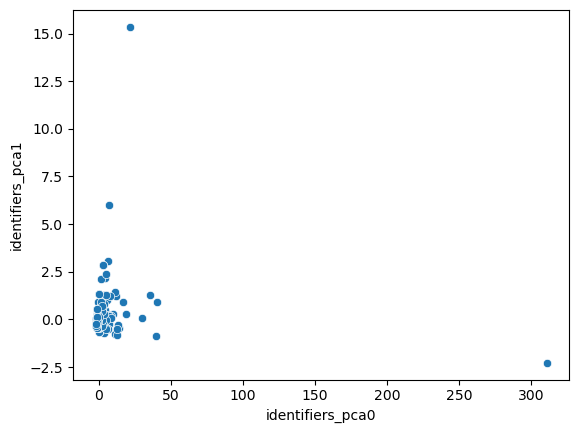

In [54]:
sns.scatterplot(df, x= df.iloc[:,1],y=df.iloc[:,2])